In [10]:
import os
import numpy as np
a=np.array([[1,2,3],[2,1,3],[3,1,2]])
b=np.random.random((3,10))
data=list(np.concatenate((a,b),axis=1))
def write2file(seq,data,filepath):
    with open(filepath,'a') as file_handle:
        for i in range(len(seq)):
            for j in range(len(seq[i])):
                file_handle.write(str(int(seq[i][j])))
                file_handle.write(' ')
            file_handle.write('\t')
            for j in range(len(data[i])):
                file_handle.write(str(data[i][j]))
                file_handle.write(' ')
            file_handle.write('\n')

def getMarkers(fr, sl, pl, aligns, targets, respons, matches, T_ons, p=0):
    if sl == 4:
        idxt = targets[:, sl - 1] != 0
    else:
        idxt = (targets[:, sl - 1] != 0) * (targets[:, sl] == 0)
    T12 = T_ons[idxt, 1] - T_ons[idxt, 0];
    T12[np.isnan(T12)] = 0
    th_T1 = 3.5;
    th_T2 = 8
    if sl == 4: ad = np.isnan(T_ons[idxt, 2] - T_ons[idxt, 1]) + np.isnan(T_ons[idxt, 3] - T_ons[idxt, 2]) + (
                T12 < th_T1)
    if sl == 3: ad = np.isnan(T_ons[idxt, 2] - T_ons[idxt, 1]) + (T12 < th_T1)  # should never omit the ()
    if sl == 2: ad = (T12 == 0) + (T12 > th_T2)
    if sl == 1: ad = np.isnan(T_ons[idxt, 0])
    ad = ad + np.isnan(T_ons[idxt, 4]);  # print(sum(np.isnan(T_ons[idxt,-1])))
    match = matches[idxt][~ad];
    target = targets[idxt, :sl][~ad];
    respon = respons[idxt, :sl][~ad]
    finish = ((respons[idxt, 0] != 0) + 0)[~ad]
    aligns1 = aligns[idxt][~ad];
    aligns2 = (aligns + T_ons[:, 4])[idxt][~ad]
    idxf = finish == 1;  # print(sum(idxf))
    tgs = target[idxf];
    res = respon[idxf];
    mah = match[idxf]
    align1 = np.round(aligns1[idxf]).astype(int)
    align2 = np.round(aligns2[idxf]).astype(int)
    fid = T_ons[idxt, :][~ad][idxf]
    # p=1 finished trial true or false
    if p == 1:
        return align1, align2, tgs, res, mah, fid
    else:
        return aligns1, aligns2, align1, align2, target, respon, match, finish, tgs, res, mah, fid

In [11]:
from scipy.ndimage import filters
import scipy.io as sio
gaussian_filter = filters.gaussian_filter
datapath = 'testpytorch//mats//more_'
datadate = '20190903'
data = sio.loadmat(datapath + datadate + '.mat')
sl, pl, fr = 3, 6, 7.5
matches = data['matches'].ravel();
targets = data['targets'];
respons = data['response']
aligns = data['cue_on'].ravel();
T_ons = data['frameid'];
Fn = data['F_']

traces = np.clip(np.apply_along_axis(gaussian_filter, 1, Fn, 1), None, 21)
align1, align2, tgs, res, mah, fid = getMarkers(fr, sl, pl, aligns, targets, respons, matches, T_ons, 1)

In [12]:
res

array([[6., 5., 3.],
       [6., 5., 2.],
       [1., 4., 3.],
       [1., 6., 5.],
       [2., 6., 5.],
       [1., 6., 5.],
       [1., 3., 4.],
       [4., 2., 6.],
       [4., 5., 6.],
       [6., 5., 4.],
       [1., 4., 6.],
       [4., 3., 5.],
       [4., 1., 2.],
       [6., 5., 1.],
       [2., 6., 3.],
       [2., 5., 6.],
       [6., 3., 4.],
       [3., 6., 4.],
       [6., 5., 3.],
       [4., 3., 5.],
       [6., 4., 1.],
       [3., 5., 6.],
       [6., 5., 4.],
       [4., 3., 5.],
       [5., 2., 3.],
       [5., 2., 4.],
       [3., 5., 6.],
       [4., 3., 5.],
       [6., 4., 1.],
       [5., 2., 4.],
       [4., 3., 5.],
       [4., 3., 5.],
       [5., 2., 3.],
       [6., 3., 1.],
       [5., 2., 3.],
       [4., 3., 5.],
       [4., 3., 5.],
       [6., 4., 1.],
       [6., 4., 1.],
       [3., 6., 5.],
       [3., 5., 6.],
       [5., 2., 3.],
       [4., 3., 5.],
       [6., 2., 5.],
       [3., 1., 2.],
       [2., 1., 3.],
       [4., 3., 2.],
       [4., 2

In [13]:
for i in range(len(res)):
    for j in range(len(res[i])):
        res[i][j]=int(res[i][j])
res

array([[6., 5., 3.],
       [6., 5., 2.],
       [1., 4., 3.],
       [1., 6., 5.],
       [2., 6., 5.],
       [1., 6., 5.],
       [1., 3., 4.],
       [4., 2., 6.],
       [4., 5., 6.],
       [6., 5., 4.],
       [1., 4., 6.],
       [4., 3., 5.],
       [4., 1., 2.],
       [6., 5., 1.],
       [2., 6., 3.],
       [2., 5., 6.],
       [6., 3., 4.],
       [3., 6., 4.],
       [6., 5., 3.],
       [4., 3., 5.],
       [6., 4., 1.],
       [3., 5., 6.],
       [6., 5., 4.],
       [4., 3., 5.],
       [5., 2., 3.],
       [5., 2., 4.],
       [3., 5., 6.],
       [4., 3., 5.],
       [6., 4., 1.],
       [5., 2., 4.],
       [4., 3., 5.],
       [4., 3., 5.],
       [5., 2., 3.],
       [6., 3., 1.],
       [5., 2., 3.],
       [4., 3., 5.],
       [4., 3., 5.],
       [6., 4., 1.],
       [6., 4., 1.],
       [3., 6., 5.],
       [3., 5., 6.],
       [5., 2., 3.],
       [4., 3., 5.],
       [6., 2., 5.],
       [3., 1., 2.],
       [2., 1., 3.],
       [4., 3., 2.],
       [4., 2

In [49]:
traces.shape

(228, 58342)

In [14]:
F_M=[]
res_M=[]
for i in range(len(mah)):
    if mah[i]==1:
        F_M.append(traces[:,align1[i]+int(0.5+fid[i,2])])
        res_M.append(res[i])

In [15]:
s=np.zeros((3,6))
for i in range(len(res_M)):
    for j in range(len(res_M[i])):
        s[j][int(res[i][j])-1]+=1
print(s)

[[26. 32. 22. 53. 22. 50.]
 [25. 29. 36. 26. 41. 48.]
 [19. 41. 30. 44. 34. 37.]]


In [16]:
print(np.array(F_M).shape)
print(np.array(res_M).shape)

(205, 228)
(205, 3)


In [19]:
d1=int(0.8*205)
d2=int(0.9*205)
write2file(res_M[:d1],F_M[:d1],'0903.data_from_train')
write2file(res_M[d1:d2],F_M[d1:d2],'0903.data_from_dev')
write2file(res_M[d2:],F_M[d2:],'0903.data_from_test')

In [3]:
vector

'-0.16046512 0.78241825 0.18706018 0.09820175 0.10556793 0.7805343 0.19509059 -0.121841945 0.6895633 0.24816704 0.6697192 0.8043039 0.91980493 0.7023424 0.969843 0.7882311 -0.2834338 0.83527374 -0.9996776 0.83951676 -0.997761 0.9999841 0.9128851 0.34695977 0.89126545 0.421739 0.24528545 0.5984825 0.97979736 0.70379424 0.06651527 0.872049 0.82943004 0.7953163 0.77702296 0.68444085 -0.9995757 0.43626916 0.8160082 0.7306132 0.727136 0.040979207 0.8879307 0.8387619 0.9313933 0.41815597 0.84260553 0.87777346 0.6402745 0.99992883 0.9949553 0.9305118 -0.23665363 0.17110425 0.7417437 -0.35717517 0.5441338 0.88100827 0.27058655 0.9500715'

In [6]:
train_file

<_io.TextIOWrapper name='role-learner-master//data//example.data_from_train' mode='r' encoding='UTF-8'>

In [66]:
train_file=open('role-learner-master//data//example.data_from_train')
count=0
for line in train_file:
    sequence, vector = line.strip().split("\t")
    count+=1
print(count)

40000


In [67]:
train_file=open('role-learner-master//data//example.data_from_dev')
count=0
for line in train_file:
    sequence, vector = line.strip().split("\t")
    count+=1
print(count)

5000


In [68]:
train_file=open('role-learner-master//data//example.data_from_test')
count=0
for line in train_file:
    sequence, vector = line.strip().split("\t")
    count+=1
print(count)

5000


In [70]:
train_file=open('role-learner-master//data//0903.data_from_train')
count=0
for line in train_file:
    sequence, vector = line.strip().split("\t")
    count+=1
print(count)

164


In [71]:
train_file=open('role-learner-master//data//0903.data_from_dev')
count=0
for line in train_file:
    sequence, vector = line.strip().split("\t")
    count+=1
print(count)

20


In [72]:
train_file=open('role-learner-master//data//0903.data_from_test')
count=0
for line in train_file:
    sequence, vector = line.strip().split("\t")
    count+=1
print(count)

21


In [36]:
import numpy as np
a=np.array([[1,2,3],[2,1,3],[3,1,2]])
b=np.random.random((3,10))
data=list(np.concatenate((a,b),axis=1))
def write2file(seq,data,filepath):
    with open(filepath,'a') as file_handle:
        for i in range(len(seq)):
            for j in range(len(seq[i])):
                file_handle.write(str(seq[i][j]))
                file_handle.write(' ')
            file_handle.write('\t')
            for j in range(len(data[i])):
                file_handle.write(str(data[i][j]))
                file_handle.write(' ')
            file_handle.write('\n')

write2file(a,b,'filepath')
    

In [19]:
for line in data:
    print(line,'\n')

[1.         1.         1.         0.20207153 0.88171615 0.41909801
 0.91594536 0.13386557 0.27352917 0.33742023 0.9961613  0.52686374
 0.97447824] 

[1.         1.         1.         0.96419012 0.0689672  0.99787812
 0.36145706 0.64141061 0.15635565 0.36972171 0.94202571 0.15915251
 0.96344063] 

[1.         1.         1.         0.30807163 0.71580246 0.86005433
 0.93423303 0.9092365  0.48522484 0.33989973 0.99716464 0.97770751
 0.99523373] 



In [38]:
train_file=open('filepath')
a=[]
for line in train_file:
    sequence, vector = line.strip().split("\t")
    a=[int(value) for value in sequence.split()]
    b=[float(vec) for vec in vector.split()]
    print(a)
    print(b)

[1, 2, 3]
[0.2005096511237614, 0.6162790667668456, 0.19233413465249072, 0.8575128409947931, 0.24193447246272415, 0.9664058235804933, 0.5856052469643271, 0.29877362472865576, 0.9833581522269814, 0.1704055237627894]
[2, 1, 3]
[0.5278713143386379, 0.8521786362166089, 0.9320157471911507, 0.8834601284477703, 0.36337080819292633, 0.9226399614078299, 0.49175745930612624, 0.5512046555164027, 0.7839578031372509, 0.4121306993817263]
[3, 1, 2]
[0.14104990984916754, 0.19234481174165552, 0.4322207608127766, 0.6885215623279684, 0.10171914808393367, 0.5472013087783069, 0.9360346456366611, 0.2942252070275232, 0.2268462085871621, 0.8762043314596956]


In [32]:
int(str(1))

1

In [2]:
import os 
import numpy as np
a=np.array([1,2,3])
b=np.random.random(10)
a=[str(x) for x in a]
b=[str(x) for x in b]
fo=open('test','w')
for i in range(10):
    fo.write(' '.join(a)+'\t'+' '.join(b)+'\n')

In [2]:
import torch 
data=torch.load('filler-learner//make_data//example//data_0.001')
for key,value in data.items():
    print(key)

noise_dim
noise_level
theta
filler_embedding
projection
Seq
Vectors


In [3]:
print(data['Seq'])

tensor([[0, 1, 2],
        [0, 1, 3],
        [0, 1, 4],
        [0, 1, 5],
        [0, 2, 1],
        [0, 2, 3],
        [0, 2, 4],
        [0, 2, 5],
        [0, 3, 1],
        [0, 3, 2],
        [0, 3, 4],
        [0, 3, 5],
        [0, 4, 1],
        [0, 4, 2],
        [0, 4, 3],
        [0, 4, 5],
        [0, 5, 1],
        [0, 5, 2],
        [0, 5, 3],
        [0, 5, 4],
        [1, 0, 2],
        [1, 0, 3],
        [1, 0, 4],
        [1, 0, 5],
        [1, 2, 0],
        [1, 2, 3],
        [1, 2, 4],
        [1, 2, 5],
        [1, 3, 0],
        [1, 3, 2],
        [1, 3, 4],
        [1, 3, 5],
        [1, 4, 0],
        [1, 4, 2],
        [1, 4, 3],
        [1, 4, 5],
        [1, 5, 0],
        [1, 5, 2],
        [1, 5, 3],
        [1, 5, 4],
        [2, 0, 1],
        [2, 0, 3],
        [2, 0, 4],
        [2, 0, 5],
        [2, 1, 0],
        [2, 1, 3],
        [2, 1, 4],
        [2, 1, 5],
        [2, 3, 0],
        [2, 3, 1],
        [2, 3, 4],
        [2, 3, 5],
        [2, 

In [6]:
print(data['Vectors'])
print(data['Vectors'].shape)

tensor([[-0.9153,  0.1638, -1.2616,  ..., -2.1676, -2.0187, -0.3857],
        [-1.6580,  1.1502, -0.4642,  ..., -2.4456, -2.2161, -0.6958],
        [-1.8849,  2.5929, -0.2463,  ..., -1.5736, -2.0493, -0.4444],
        ...,
        [ 1.0874,  1.2671, -0.6637,  ...,  1.3415, -1.2450, -1.6332],
        [ 0.5713,  0.8125, -0.0868,  ...,  0.1921, -1.6117, -2.1905],
        [-0.1716,  1.7996,  0.7097,  ..., -0.0872, -1.8117, -2.4956]],
       requires_grad=True)
torch.Size([120, 200])


In [24]:
print(type(data['Seq']))
print(type(data['Vectors']))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [16]:
a=torch.nn.Embedding(6,2)
a.weight.shape[1]

2

In [21]:
import random
a=torch.randn(3,3)
b=torch.randn(3,5)
c=[a,b]
print(c,'\n')
random.shuffle(c)
print(c)


[tensor([[ 0.3742, -0.6761,  0.8012],
        [-0.7073,  0.1210, -1.1370],
        [-2.3549, -0.7193, -1.0175]]), tensor([[ 0.2974, -0.5913,  0.3830,  1.4682,  0.2398],
        [ 0.9475,  2.1514, -1.0607, -0.3375, -0.7549],
        [ 0.0255,  0.2697, -0.3322, -2.6820,  0.8656]])] 

[tensor([[ 0.2974, -0.5913,  0.3830,  1.4682,  0.2398],
        [ 0.9475,  2.1514, -1.0607, -0.3375, -0.7549],
        [ 0.0255,  0.2697, -0.3322, -2.6820,  0.8656]]), tensor([[ 0.3742, -0.6761,  0.8012],
        [-0.7073,  0.1210, -1.1370],
        [-2.3549, -0.7193, -1.0175]])]


In [26]:
Vectors=data['Vectors']
Train_Vectors=torch.cat((Vectors[::3],Vectors[1::3]),dim=0)
print(Train_Vectors.shape)

torch.Size([80, 200])


tensor([[-0.8452,  1.7940],
        [ 1.1368,  1.6232],
        [ 2.5307, -0.2311],
        [-0.7999, -1.1464],
        [-2.5559,  0.2262],
        [ 0.6458, -1.3828]])


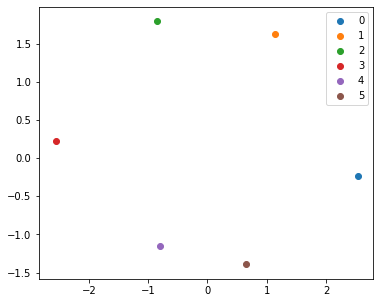

In [5]:
#0-2
#3-4
import torch
from FillerTPE import FillerTPE
from FillerLSTM import FillerLSTM
import matplotlib.pyplot as plt

data=torch.load('make_data//example//data_0.001')
Seq=data['Seq']
Assigner=torch.load('TPE//data_0.001assigner.pth')
Model=torch.load('TPE//data_0.001TPE.pth')

FE=Assigner.filler_embedding.weight.data
print(FE)
X=[[0,2],[1,1],[2,0],[3,4],[4,3],[5,5]]
FE_order=torch.zeros(6,2)
for i in range(6):
    FE_order[i]=FE[X[i][1]]
    
plt.figure(figsize=(6,5))
for i in range(6):
    plt.scatter(FE_order[i,0],FE_order[i,1],label=str(i))
plt.legend()
plt.show()

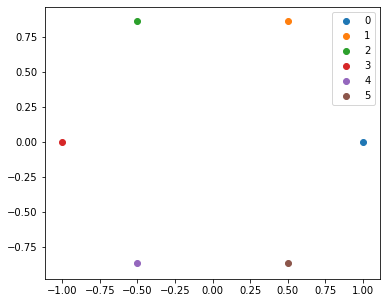

In [44]:
Pre_embedding=data['filler_embedding']
plt.figure(figsize=(6,5))
for i in range(6):
    plt.scatter(Pre_embedding[i,0],Pre_embedding[i,1],label=str(i))
plt.legend()
plt.show()    

In [57]:
output,filler_prediction=Assigner(Seq)
filler_prediction=torch.argmax(filler_prediction,2).transpose(0,1)
print(Seq)
print(filler_prediction)

tensor([[0, 1, 2],
        [0, 1, 3],
        [0, 1, 4],
        [0, 1, 5],
        [0, 2, 1],
        [0, 2, 3],
        [0, 2, 4],
        [0, 2, 5],
        [0, 3, 1],
        [0, 3, 2],
        [0, 3, 4],
        [0, 3, 5],
        [0, 4, 1],
        [0, 4, 2],
        [0, 4, 3],
        [0, 4, 5],
        [0, 5, 1],
        [0, 5, 2],
        [0, 5, 3],
        [0, 5, 4],
        [1, 0, 2],
        [1, 0, 3],
        [1, 0, 4],
        [1, 0, 5],
        [1, 2, 0],
        [1, 2, 3],
        [1, 2, 4],
        [1, 2, 5],
        [1, 3, 0],
        [1, 3, 2],
        [1, 3, 4],
        [1, 3, 5],
        [1, 4, 0],
        [1, 4, 2],
        [1, 4, 3],
        [1, 4, 5],
        [1, 5, 0],
        [1, 5, 2],
        [1, 5, 3],
        [1, 5, 4],
        [2, 0, 1],
        [2, 0, 3],
        [2, 0, 4],
        [2, 0, 5],
        [2, 1, 0],
        [2, 1, 3],
        [2, 1, 4],
        [2, 1, 5],
        [2, 3, 0],
        [2, 3, 1],
        [2, 3, 4],
        [2, 3, 5],
        [2, 

In [65]:
import numpy as np
nSeq=np.array(Seq.reshape(360))
nF=np.array(filler_prediction.reshape(360))
nSeq2F=nSeq.copy()
def transform(M):
    N=np.zeros_like(M)
    N[M==0]=2
    N[M==1]=1
    N[M==2]=0
    N[M==3]=4
    N[M==4]=3
    N[M==5]=5
    return N
nSeq2F=transform(nSeq2F)
print(nF)
print(nSeq2F)
if nF.all()==nSeq2F.all():
    print('the same')

[2 1 0 2 1 4 2 1 3 2 1 5 2 0 1 2 0 4 2 0 3 2 0 5 2 4 1 2 4 0 2 4 3 2 4 5 2
 3 1 2 3 0 2 3 4 2 3 5 2 5 1 2 5 0 2 5 4 2 5 3 1 2 0 1 2 4 1 2 3 1 2 5 1 0
 2 1 0 4 1 0 3 1 0 5 1 4 2 1 4 0 1 4 3 1 4 5 1 3 2 1 3 0 1 3 4 1 3 5 1 5 2
 1 5 0 1 5 4 1 5 3 0 2 1 0 2 4 0 2 3 0 2 5 0 1 2 0 1 4 0 1 3 0 1 5 0 4 2 0
 4 1 0 4 3 0 4 5 0 3 2 0 3 1 0 3 4 0 3 5 0 5 2 0 5 1 0 5 4 0 5 3 4 2 1 4 2
 0 4 2 3 4 2 5 4 1 2 4 1 0 4 1 3 4 1 5 4 0 2 4 0 1 4 0 3 4 0 5 4 3 2 4 3 1
 4 3 0 4 3 5 4 5 2 4 5 1 4 5 0 4 5 3 3 2 1 3 2 0 3 2 4 3 2 5 3 1 2 3 1 0 3
 1 4 3 1 5 3 0 2 3 0 1 3 0 4 3 0 5 3 4 2 3 4 1 3 4 0 3 4 5 3 5 2 3 5 1 3 5
 0 3 5 4 5 2 1 5 2 0 5 2 4 5 2 3 5 1 2 5 1 0 5 1 4 5 1 3 5 0 2 5 0 1 5 0 4
 5 0 3 5 4 2 5 4 1 5 4 0 5 4 3 5 3 2 5 3 1 5 3 0 5 3 4]
[2 1 0 2 1 4 2 1 3 2 1 5 2 0 1 2 0 4 2 0 3 2 0 5 2 4 1 2 4 0 2 4 3 2 4 5 2
 3 1 2 3 0 2 3 4 2 3 5 2 5 1 2 5 0 2 5 4 2 5 3 1 2 0 1 2 4 1 2 3 1 2 5 1 0
 2 1 0 4 1 0 3 1 0 5 1 4 2 1 4 0 1 4 3 1 4 5 1 3 2 1 3 0 1 3 4 1 3 5 1 5 2
 1 5 0 1 5 4 1 5 3 0 2 1 0 2 4 0 2 3 0 2 5 0

In [106]:
import torch
import numpy as np
import matplotlib.pyplot as plt
data=torch.load('TPE//data_0.001Embedding_trace')
A=torch.zeros(500,6,2)
for i in range(500):
    A[i]=data[i]
print(A.shape)
A=A.transpose(0,1)
print(A.shape)
A=A.numpy()
A=A.tolist()
plt.figure(figsize=(6,5))
for i in range(6):
    plt.plot(list(A[i,:,0]),list(A[i,:,1]),label=str(i))
plt.legend()
plt.show()

torch.Size([500, 6, 2])
torch.Size([6, 500, 2])


TypeError: list indices must be integers or slices, not tuple

<Figure size 432x360 with 0 Axes>

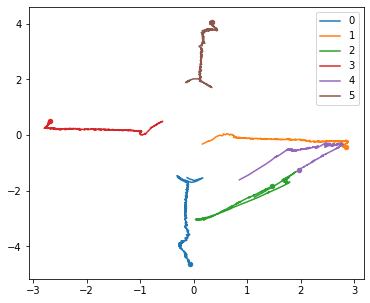

In [130]:
import torch
import numpy as np
import matplotlib.pyplot as plt
data=torch.load('TPE_3//data_0.001Embedding_trace')
A=torch.zeros(500,6,2)
for i in range(500):
    A[i]=data[i]
A=A.detach()
A.transpose(0,1)
A=np.array(A.transpose(0,1))
plt.figure(figsize=(6,5))
for i in range(6):
    plt.plot(list(A[i,:,0]),list(A[i,:,1]),label=str(i))
for i in range(6):
    plt.scatter(A[i,499,0],A[i,499,1],s=20)
plt.legend()
plt.show()

tensor([[-0.8452,  1.7940],
        [ 1.1368,  1.6232],
        [ 2.5307, -0.2311],
        [-0.7999, -1.1464],
        [-2.5559,  0.2262],
        [ 0.6458, -1.3828]])


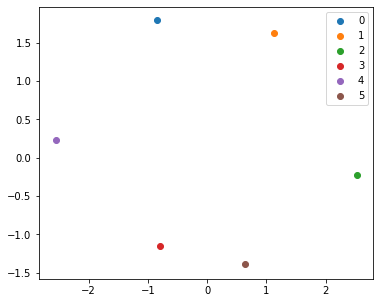

In [131]:
import torch
import numpy as np
import matplotlib.pyplot as plt
assigner=torch.load('TPE_3//data_0.001assigner.pth')
FE=Assigner.filler_embedding.weight.data
print(FE)
plt.figure(figsize=(6,5))
for i in range(6):
    plt.scatter(FE[i,0],FE[i,1],label=str(i))
plt.legend()
plt.show()

In [124]:
Em=torch.nn.Embedding(6,2)
Emm=Em.weight.clone().detach()
print(Emm)

tensor([[ 0.4306,  1.1489],
        [-1.7417, -0.7226],
        [ 0.3602,  0.6629],
        [ 1.2648,  0.5959],
        [-0.4239,  1.6323],
        [ 1.2209,  0.1898]])
